In [1]:
import pandas as pd
import sklearn

In [48]:
from sklearn import tree

In [29]:
dataset = pd.read_csv("cli-cli_data.csv")

In [8]:
import numpy as np
np.count_nonzero(dataset["is_spam"] == 0)

553

In [14]:
dataset["age"] /= 10**6 * 60 * 60 * 24

In [30]:
dataset

,association,contributions,repos,age,followers,following,is_spam
0,3,2629,21,2612,21,6,0
1,3,2629,21,2611,21,6,0
2,3,4041,12,1772,29,0,0
3,4,1402,12,4536,447,45,0
4,0,2,2,3030,1,0,0
...,...,...,...,...,...,...,...
781,3,0,0,1567,39,0,1
782,3,128,3,1827,1019,5,1
783,4,1402,12,3794,447,45,1
784,3,0,0,1498,39,0,1


In [34]:
shuffled = dataset.sample(frac=1)

In [35]:
shuffled

,association,contributions,repos,age,followers,following,is_spam
618,0,25,5,166,1,1,1
446,4,1536,23,4374,4012,22,0
348,0,540,17,3297,629,22,0
516,3,0,0,1544,39,0,0
18,4,1402,12,4500,447,45,0
...,...,...,...,...,...,...,...
231,0,656,32,2152,44,19,0
454,0,692,0,3103,363,12,0
437,0,2942,47,3835,143,8,0
208,0,520,8,2611,23,50,0


In [61]:
features = ["association","contributions","repos","age","followers","following"]
inps = dataset[features]
targs = dataset["is_spam"]

In [65]:
clf = tree.DecisionTreeClassifier(
    random_state=0, 
    max_depth=8,
    criterion="gini")

In [66]:
clf.fit(inps, targs)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [67]:
clf.score(inps,targs)

0.9694656488549618

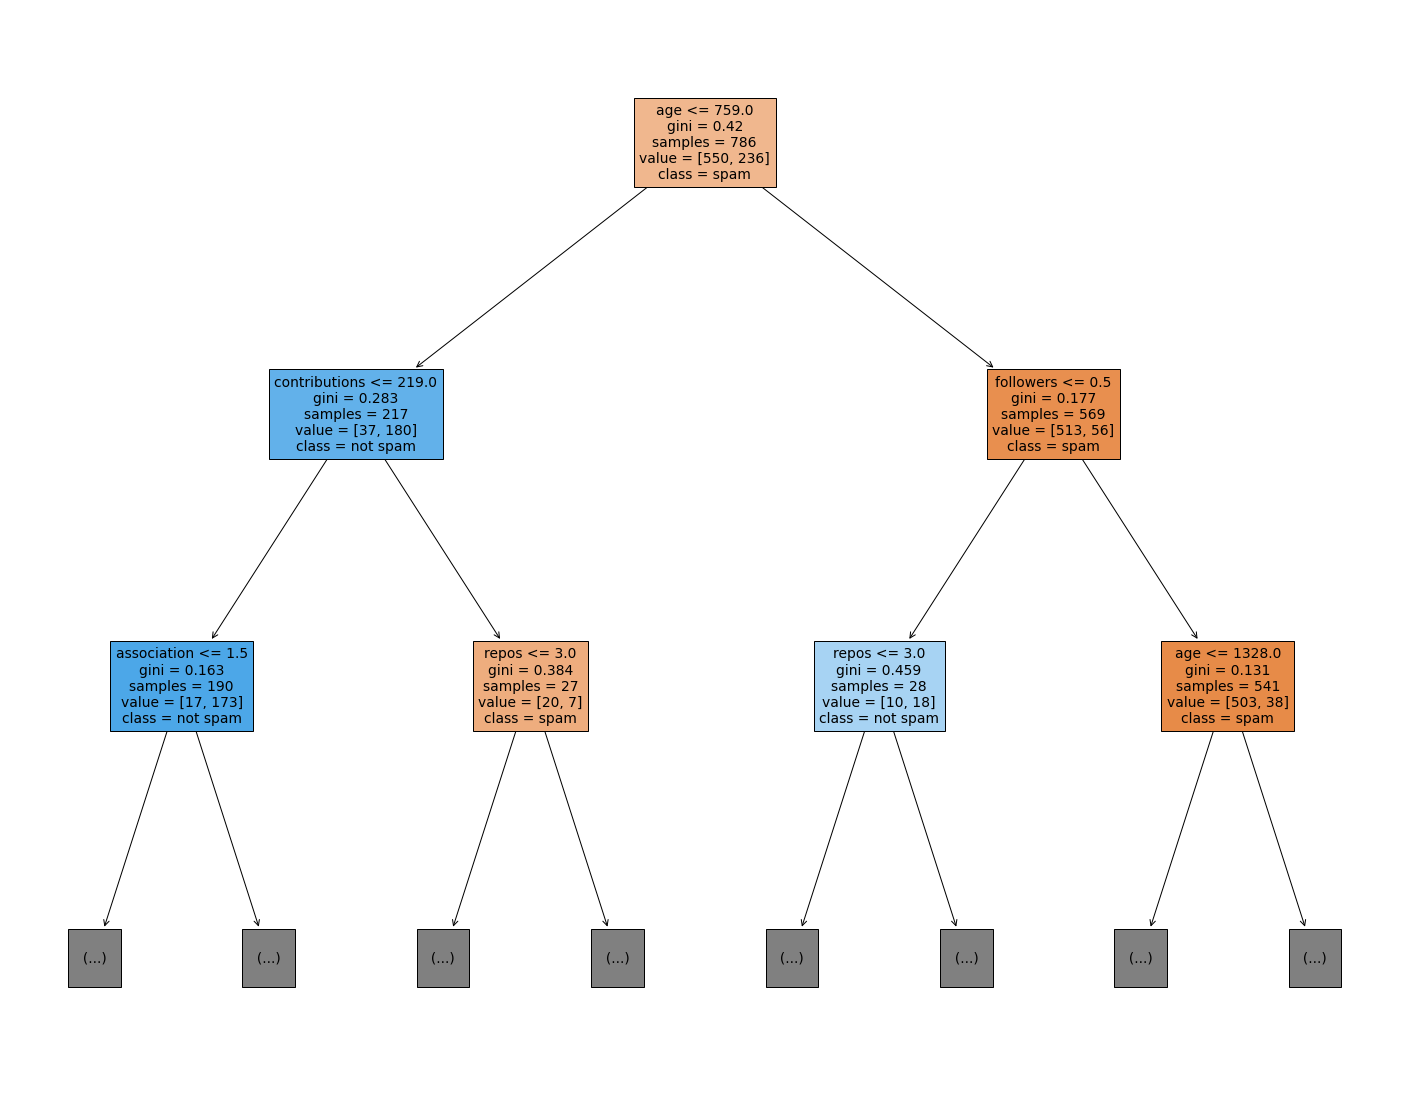

In [68]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   max_depth=2,
                   filled=True,
                   feature_names = features,
                   class_names = ["spam","not spam"])